# 交叉验证

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

# ((150, 4), (150,))

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size = 0.4, random_state = 0
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((90, 4), (60, 4), (90,), (60,))

((90, 4), (60, 4), (90,), (60,))

In [ ]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

# 0.9666666666666667

0.9666666666666667

## 计算交叉验证指标

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

# array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# 0.98 accuracy with a standard deviation of 0.02

0.98 accuracy with a standard deviation of 0.02


In [ ]:
from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

# array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)

# array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

In [8]:
cv

ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None)

In [ ]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1
custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, y, cv=custom_cv)

# array([1.        , 0.97333333])

array([1.        , 0.97333333])

In [ ]:
from sklearn.model_selection import cross_validate

# 定义度量指标
scoring = ["precision_macro", "recall_macro"]

# 定义学习器
clf = svm.SVC(kernel='linear', C=1, random_state=0)

# 执行交叉验证
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
scores["test_precision_macro"]

# array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ])

array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ])

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(clf, X, y, scoring=scoring,
                        cv=5, return_train_score=True)
sorted(scores.keys())
scores['train_rec_macro']

# array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])

array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])

In [ ]:
scores = cross_validate(clf, X, y,
                        scoring='precision_macro', cv=5,
                        return_estimator=True)
sorted(scores.keys())

# ['estimator', 'fit_time', 'score_time', 'test_score']

['estimator', 'fit_time', 'score_time', 'test_score']

## 交叉验证迭代器

### 独立同分布数据的交叉验证迭代器

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

# [2 3] [0 1]
# [0 1] [2 3]

[2 3] [0 1]
[0 1] [2 3]


In [24]:
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 0, 1])
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

# [2 3] [0 1]
# [0 1] [2 3]
# [0 2] [1 3]
# [1 3] [0 2]

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


In [ ]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

# [1 2 3] [0]
# [0 2 3] [1]
# [0 1 3] [2]
# [0 1 2] [3]

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [ ]:
from sklearn.model_selection import LeavePOut

X = np.ones(4)
lpo = LeavePOut(p=2)
for train, test in lpo.split(X):
    print("%s %s" % (train, test))

# [2 3] [0 1]
# [1 3] [0 2]
# [1 2] [0 3]
# [0 3] [1 2]
# [0 2] [1 3]
# [0 1] [2 3]

[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]


In [ ]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

# [9 1 6 7 3 0 5] [2 8 4]
# [2 9 8 0 6 7 4] [3 5 1]
# [4 5 1 0 6 9 7] [2 3 8]
# [2 7 5 8 0 3 4] [6 1 9]
# [4 1 0 6 8 9 3] [5 2 7]

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


### 基于类别标签分层的交叉验证迭代器

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))
kf = KFold(n_splits=3)
for train, test in kf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

# train -  [30  3]   |   test -  [15  2]
# train -  [30  3]   |   test -  [15  2]
# train -  [30  4]   |   test -  [15  1]
# train -  [28  5]   |   test -  [17]
# train -  [28  5]   |   test -  [17]
# train -  [34]   |   test -  [11  5]

train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]
train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


### 分组数据的交叉验证迭代器

In [ ]:
from sklearn.model_selection import GroupKFold

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

# [0 1 2 3 4 5] [6 7 8 9]
# [0 1 2 6 7 8 9] [3 4 5]
# [3 4 5 6 7 8 9] [0 1 2]

[0 1 2 3 4 5] [6 7 8 9]
[0 1 2 6 7 8 9] [3 4 5]
[3 4 5 6 7 8 9] [0 1 2]


In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
X = list(range(18))
y = [1] * 6 + [0] * 12
groups = [1, 2, 3, 3, 4, 4, 1, 1, 2, 2, 3, 4, 5, 5, 5, 6, 6, 6]
sgkf = StratifiedGroupKFold(n_splits=3)
for train, test in sgkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

# [ 0  2  3  4  5  6  7 10 11 15 16 17] [ 1  8  9 12 13 14]
# [ 0  1  4  5  6  7  8  9 11 12 13 14] [ 2  3 10 15 16 17]
# [ 1  2  3  8  9 10 12 13 14 15 16 17] [ 0  4  5  6  7 11]

[ 0  2  3  4  5  6  7 10 11 15 16 17] [ 1  8  9 12 13 14]
[ 0  1  4  5  6  7  8  9 11 12 13 14] [ 2  3 10 15 16 17]
[ 1  2  3  8  9 10 12 13 14 15 16 17] [ 0  4  5  6  7 11]


In [ ]:
from sklearn.model_selection import LeaveOneGroupOut

X = [1, 5, 10, 50, 60, 70, 80]
y = [0, 1, 1, 2, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3, 3]
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

# [2 3 4 5 6] [0 1]
# [0 1 4 5 6] [2 3]
# [0 1 2 3] [4 5 6]

[2 3 4 5 6] [0 1]
[0 1 4 5 6] [2 3]
[0 1 2 3] [4 5 6]


In [ ]:
from sklearn.model_selection import LeavePGroupsOut

X = np.arange(6)
y = [1, 1, 1, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3]
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

# [4 5] [0 1 2 3]
# [2 3] [0 1 4 5]
# [0 1] [2 3 4 5]

[4 5] [0 1 2 3]
[2 3] [0 1 4 5]
[0 1] [2 3 4 5]


In [ ]:
from sklearn.model_selection import GroupShuffleSplit

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 0.001]
y = ["a", "b", "b", "b", "c", "c", "c", "a"]
groups = [1, 1, 2, 2, 3, 3, 4, 4]
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("%s %s" % (train, test))

# [0 1 2 3] [4 5 6 7]
# [2 3 6 7] [0 1 4 5]
# [2 3 4 5] [0 1 6 7]
# [4 5 6 7] [0 1 2 3]

[0 1 2 3] [4 5 6 7]
[2 3 6 7] [0 1 4 5]
[2 3 4 5] [0 1 6 7]
[4 5 6 7] [0 1 2 3]


In [ ]:
import numpy as np
from sklearn.model_selection import GroupShuffleSplit

X = np.array([0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 0.001])
y = np.array(["a", "b", "b", "b", "c", "c", "c", "a"])
groups = np.array([1, 1, 2, 2, 3, 3, 4, 4])
train_indx, test_indx = next(
    GroupShuffleSplit(random_state=7).split(X, y, groups)
)
X_train, X_test, y_train, y_test = \
    X[train_indx], X[test_indx], y[train_indx], y[test_indx]
X_train.shape, X_test.shape
np.unique(groups[train_indx]), np.unique(groups[test_indx])

# (array([1, 2, 4]), array([3]))

(array([1, 2, 4]), array([3]))

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)
for train, test in tscv.split(X):
    print("%s %s" % (train, test))

# TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
# [0 1 2] [3]
# [0 1 2 3] [4]
# [0 1 2 3 4] [5]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


In [37]:
clf.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# 调参

## 穷举网格搜索

In [38]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [ ]:
# 网格搜索
X, y = datasets.load_iris(return_X_y=True)
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
grid_search.best_params_

# {'C': 1, 'kernel': 'linear'}

{'C': 1, 'kernel': 'linear'}

In [41]:
grid_search.best_score_

0.9800000000000001

In [42]:
# 嵌套重抽样
from sklearn.model_selection import cross_val_score
scores = cross_val_score(grid_search, X, y, cv=5)
scores.mean()

0.9666666666666668

## 随机搜索

In [47]:
from scipy.stats import loguniform
{'C': loguniform(1e0, 1e3),
 'gamma': loguniform(1e-4, 1e-3),
 'kernel': ['rbf'],
 'class_weight':['balanced', None]}

{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x118bdfb30>,
 'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x118bddd90>,
 'kernel': ['rbf'],
 'class_weight': ['balanced', None]}

In [ ]:
# 随机搜索
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    svm.SVC(),
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)
random_search.fit(X, y)
random_search.best_params_

# {'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}

{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}

In [50]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

## Hyperband

In [54]:
import time
import pandas as pd
from scipy.stats import randint

# 1. 导入必要的 Scikit-learn 组件
# HalvingGridSearchCV 仍是实验性功能，需要显式启用
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# --- 2. 创建一个合成数据集 ---
# 创建一个中等大小的数据集，以便观察资源使用的变化
X, y = make_classification(
    n_samples=2000,
    n_features=30,
    n_informative=15,
    n_redundant=5,
    random_state=42
)
print(f"数据集形状: {X.shape}")
print("-" * 50)


# --- 3. 定义模型和要搜索的超参数网格 ---
# 定义一个随机森林分类器
model = RandomForestClassifier(random_state=42)

# 定义一个包含多个参数组合的网格
# 总共有 3 * 3 = 9 个候选参数组合
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# --- 4. 初始化并运行 HalvingGridSearchCV ---
# factor=3: 每轮淘汰2/3的候选者，资源增加3倍
# min_resources='exhaust': 自动将初始资源设置为 factor 的 n_iterations - 1 次方。或者可以设为具体数值，如 min_resources=50
# verbose=1: 打印详细的搜索过程日志
search = HalvingGridSearchCV(
    estimator=model,
    param_grid=param_grid,
    factor=3,
    resource='n_estimators', # 资源可以是 'n_estimators' 或 'min_samples_leaf'
    min_resources=50, # 也可以设置为 'exhaust'
    max_resources=1000,
    cv=5, # 5折交叉验证
    verbose=1,
    random_state=42,
    n_jobs=-1 # 使用所有CPU核心
)

print("开始使用 HalvingGridSearchCV进行超参数搜索...")
start_time = time.time()
search.fit(X, y)
end_time = time.time()

print(f"\n搜索完成！耗时: {end_time - start_time:.2f} 秒")
print("-" * 50)


# --- 5. 查看结果 ---
print(f"找到的最佳参数组合: {search.best_params_}")
print(f"对应的最佳得分 (在最后一轮的最大资源上): {search.best_score_:.4f}")

# 将详细的交叉验证结果转换为 Pandas DataFrame 以便更好地查看
results_df = pd.DataFrame(search.cv_results_)

# 筛选并排序，以清晰地展示每一轮的淘汰过程
# 'iter' 是迭代轮次, 'n_resources' 是使用的样本数
# 'rank_test_score' 是排名
sorted_results = results_df.sort_values(by=['iter', 'rank_test_score'])
print("\n详细搜索过程 (部分关键列):")
print(sorted_results[[
    'iter', 'n_resources', 'rank_test_score', 'mean_test_score', 'params'
]])

数据集形状: (2000, 30)
--------------------------------------------------
开始使用 HalvingGridSearchCV进行超参数搜索...
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 50
max_resources_: 1000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 50
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 1
n_candidates: 3
n_resources: 150
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 1
n_resources: 450
Fitting 5 folds for each of 1 candidates, totalling 5 fits

搜索完成！耗时: 7.17 秒
--------------------------------------------------
找到的最佳参数组合: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 450}
对应的最佳得分 (在最后一轮的最大资源上): 0.9055

详细搜索过程 (部分关键列):
    iter  n_resources  rank_test_score  mean_test_score  \
6      0           50                3           0.8980   
8      0           50                5           0.8935   
7      0           50                7           0

## 高级技巧

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons()
calibrated_forest = CalibratedClassifierCV(
   estimator=RandomForestClassifier(n_estimators=10))
param_grid = {
   'estimator__max_depth': [2, 4, 6, 8]}
search = GridSearchCV(calibrated_forest, param_grid, cv=5)
search.fit(X, y)

GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(estimator=RandomForestClassifier(n_estimators=10)),
             param_grid={'estimator__max_depth': [2, 4, 6, 8]})

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
pipe = Pipeline([
   ('select', SelectKBest()),
   ('model', calibrated_forest)])
param_grid = {
   'select__k': [1, 2],
   'model__estimator__max_depth': [2, 4, 6, 8]}
search = GridSearchCV(pipe, param_grid, cv=5).fit(X, y)

# 决策阈值

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
X, y = make_classification(random_state=0)
classifier = DecisionTreeClassifier(max_depth=2, random_state=0).fit(X, y)
classifier.predict_proba(X[:4])
classifier.predict(X[:4])

# array([0, 0, 1, 1])

array([0, 0, 1, 1])

训练集形状: (1400, 20)
测试集形状: (600, 20)
--------------------------------------------------
--- 使用默认阈值 (0.5) 的性能报告 ---
              precision    recall  f1-score   support

     Class 0       0.92      0.98      0.95       530
     Class 1       0.72      0.33      0.45        70

    accuracy                           0.91       600
   macro avg       0.82      0.66      0.70       600
weighted avg       0.89      0.91      0.89       600



/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21484 (\N{CJK UNIFIED IDEOGRAPH-53EC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaV

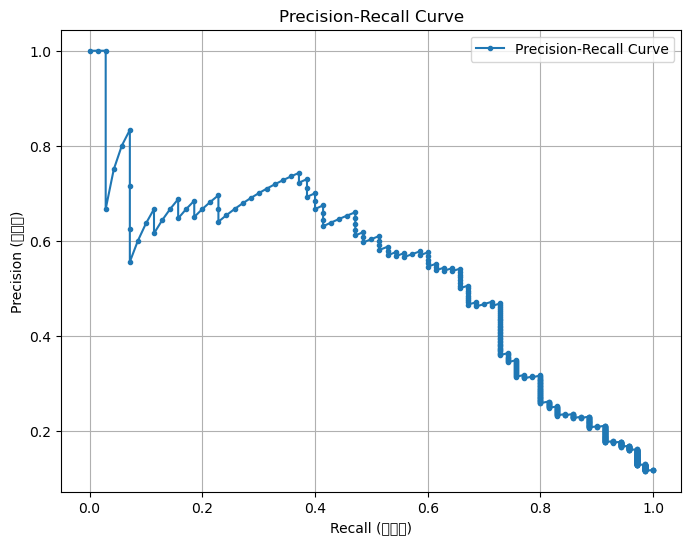

--------------------------------------------------
根据F1分数找到的最佳决策阈值是: 0.2455
在该阈值下，F1分数为: 0.5935
--------------------------------------------------
--- 使用优化后的决策阈值的性能报告 ---
              precision    recall  f1-score   support

     Class 0       0.95      0.93      0.94       530
     Class 1       0.54      0.66      0.59        70

    accuracy                           0.90       600
   macro avg       0.75      0.79      0.77       600
weighted avg       0.91      0.90      0.90       600



In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    precision_recall_curve,
    auc,
    f1_score,
)

# --- 1. 创建一个不平衡的二元分类数据集 ---
# 90% 的样本属于类别0, 10% 的样本属于类别1
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    weights=[0.9, 0.1], # 类别不平衡
    flip_y=0.05,
    random_state=42,
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"训练集形状: {X_train.shape}")
print(f"测试集形状: {X_test.shape}")
print("-" * 50)


# --- 2. 训练模型并使用默认阈值(0.5)进行评估 ---
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# .predict() 方法内部使用的就是 0.5 的决策阈值
y_pred_default = model.predict(X_test)

print("--- 使用默认阈值 (0.5) 的性能报告 ---")
print(classification_report(y_test, y_pred_default, target_names=['Class 0', 'Class 1']))


# --- 3. 可视化权衡并寻找最佳阈值 ---
# 首先，获取模型对测试集预测为类别1的概率
y_scores = model.predict_proba(X_test)[:, 1]

# 计算不同阈值下的精确率和召回率
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# 绘制精确率-召回率曲线
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall (召回率)')
plt.ylabel('Precision (精确率)')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# --- 4. 以最大化 F1 分数为目标，自动寻找最佳阈值 ---
# F1 = 2 * (Precision * Recall) / (Precision + Recall)
# 我们在 precision_recall_curve 返回的所有阈值上计算 F1 分数
# 注意：thresholds 的长度比 precisions/recalls 少一个，所以我们对齐一下
f1_scores = [f1_score(y_test, y_scores >= t) for t in thresholds]


# 找到F1分数最大时的索引
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print("-" * 50)
print(f"根据F1分数找到的最佳决策阈值是: {best_threshold:.4f}")
print(f"在该阈值下，F1分数为: {f1_scores[best_idx]:.4f}")
print("-" * 50)

# --- 5. 应用新的最佳阈值并进行最终评估 ---
# 使用新的阈值来生成最终预测
y_pred_optimal = (y_scores >= best_threshold).astype(int)

print("--- 使用优化后的决策阈值的性能报告 ---")
print(classification_report(y_test, y_pred_optimal, target_names=['Class 0', 'Class 1']))

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import FixedThresholdClassifier
from sklearn.frozen import FrozenEstimator

# --- 2. 创建并准备数据 ---
# 创建一个不平衡的数据集
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    weights=[0.9, 0.1], # 类别不平衡
    random_state=42,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"数据集准备完成。测试集中类别1的样本数量: {np.sum(y_test)}")
print("-" * 60)

# --- 3. 训练一个基础模型 ---
# 假设我们已经训练好了一个逻辑回归模型
base_estimator = LogisticRegression(solver='liblinear', random_state=42)
base_estimator.fit(X_train, y_train)
print("基础逻辑回归模型训练完成。")

# --- 4. 使用默认阈值 (0.5) 进行预测作为基准 ---
y_pred_default = base_estimator.predict(X_test)
print("\n--- 1. 基准：使用默认阈值 (0.5) 的性能报告 ---")
print(classification_report(y_test, y_pred_default))


# --- 5. 确定要使用的固定阈值 ---
# 假设通过之前的分析（如绘制P-R曲线），我们发现 0.28 是一个更好的阈值
# 它可以更好地平衡精确率和召回率，或者最大化我们关心的F1分数
FIXED_THRESHOLD = 0.28
print(f"\n我们已经确定了最佳决策阈值为: {FIXED_THRESHOLD}")
print("-" * 60)


# --- 6. 使用 FixedThresholdClassifier 和 FrozenEstimator 构建最终模型 ---
# 步骤 a: “冻结”我们已经训练好的基础模型，防止它被意外地重新训练
frozen_estimator = FrozenEstimator(base_estimator)
print("步骤 a: 基础模型已被 'FrozenEstimator' 冻结。")

# 步骤 b: 使用 FixedThresholdClassifier 包装冻结后的模型，并设置固定阈值
final_model = FixedThresholdClassifier(
    estimator=frozen_estimator,
    threshold=FIXED_THRESHOLD
)
print(f"步骤 b: 已创建 FixedThresholdClassifier，其固定阈值为 {FIXED_THRESHOLD}。")

# 注意：如果我们现在对 final_model 调用 .fit()，它不会重新训练内部的逻辑回归模型，
# 因为 FrozenEstimator 会拦截并忽略 fit 调用。


# --- 7. 使用最终模型进行预测并评估性能 ---
y_pred_final = final_model.predict(X_test)
print("\n--- 2. 对比：使用固定阈值的最终模型的性能报告 ---")
print(classification_report(y_test, y_pred_final))

ImportError: cannot import name 'get_tags' from 'sklearn.utils' (/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/__init__.py)

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import FixedThresholdClassifier, train_test_split
X, y = make_classification(
    n_samples=1_000, weights=[0.9, 0.1], class_sep=0.8, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)
classifier = LogisticRegression(random_state=0).fit(X_train, y_train)
print(confusion_matrix(y_test, classifier.predict(X_test)))
classifier_other_threshold = FixedThresholdClassifier(
    classifier, threshold=0.1, response_method="predict_proba"
).fit(X_train, y_train)
print(confusion_matrix(y_test, classifier_other_threshold.predict(X_test)))

[[217   7]
 [ 19   7]]
[[184  40]
 [  6  20]]


In [2]:
from sklearn.datasets import make_classification
from sklearn.frozen import FrozenEstimator
from sklearn.linear_model import LogisticRegression
X, y = make_classification(random_state=0)
clf = LogisticRegression(random_state=0).fit(X, y)
frozen_clf = FrozenEstimator(clf)
frozen_clf.fit(X, y)  # No-op
frozen_clf.predict(X)  # Predictions from `clf.predict`

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

# 验证曲线

## 验证曲线

In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(
    SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 3),
)
train_scores
valid_scores

# array([[0.9       , 0.9       , 0.9       , 0.96666667, 0.9       ],
#        [0.9       , 0.83333333, 0.96666667, 0.96666667, 0.93333333],
#        [1.        , 0.93333333, 1.        , 1.        , 0.9       ]])

array([[0.9       , 0.9       , 0.9       , 0.96666667, 0.9       ],
       [0.9       , 0.83333333, 0.96666667, 0.96666667, 0.93333333],
       [1.        , 0.93333333, 1.        , 1.        , 0.9       ]])

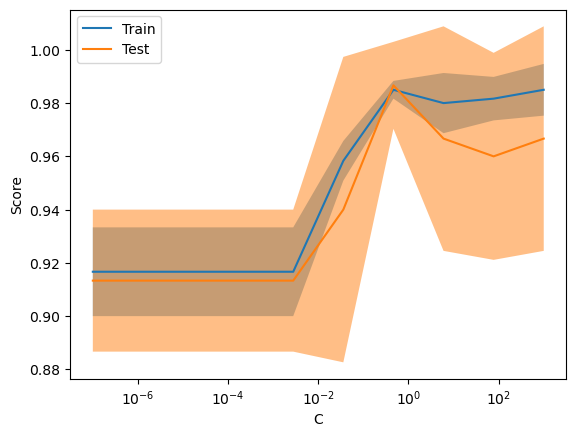

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
ValidationCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 10)
)

## 学习曲线

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)
train_sizes
train_scores
valid_scores

# array([[1.        , 0.93333333, 1.        , 1.        , 0.96666667],
#        [1.        , 0.96666667, 1.        , 1.        , 0.96666667],
#        [1.        , 0.96666667, 1.        , 1.        , 0.96666667]])

array([[1.        , 0.93333333, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667],
       [1.        , 0.96666667, 1.        , 1.        , 0.96666667]])

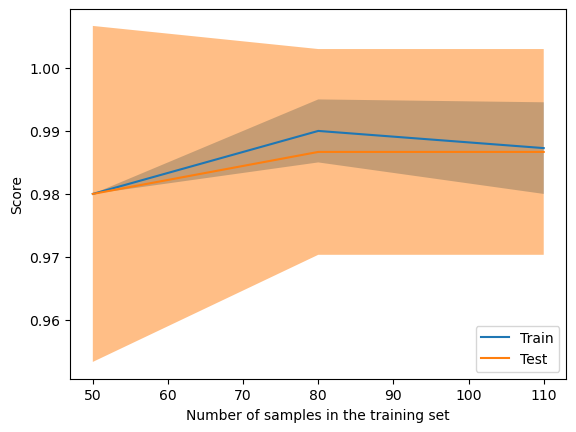

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
LearningCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)

# 度量指标

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
X, y = datasets.load_iris(return_X_y=True)
clf = svm.SVC(random_state=0)
cross_val_score(clf, X, y, cv=5, scoring='recall_macro')

# array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [2]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
                    scoring=ftwo_scorer, cv=5)

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
# A sample toy binary classification dataset
X, y = datasets.make_classification(n_classes=2, random_state=0)
svm = LinearSVC(random_state=0)
def confusion_matrix_scorer(clf, X, y):
     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}
cv_results = cross_validate(svm, X, y, cv=5,
                            scoring=confusion_matrix_scorer)
# Getting the test set true positive scores
print(cv_results['test_tp'])
# Getting the test set false negative scores
print(cv_results['test_fn'])

[10  9  8  7  8]
[0 1 2 3 2]


In [4]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)
accuracy_score(y_true, y_pred, normalize=False)

2.0

In [5]:
accuracy_score(y_true, y_pred)

0.5

In [6]:
import numpy as np
from sklearn.metrics import top_k_accuracy_score
y_true = np.array([0, 1, 2, 2])
y_score = np.array([[0.5, 0.2, 0.2],
                    [0.3, 0.4, 0.2],
                    [0.2, 0.4, 0.3],
                    [0.7, 0.2, 0.1]])
top_k_accuracy_score(y_true, y_score, k=2)
# Not normalizing gives the number of "correctly" classified samples
top_k_accuracy_score(y_true, y_score, k=2, normalize=False)

3

In [7]:
from sklearn.metrics import cohen_kappa_score
labeling1 = [2, 0, 2, 2, 0, 1]
labeling2 = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(labeling1, labeling2)

0.4285714285714286

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

# array([[2, 0, 0],
#        [0, 0, 1],
#        [1, 0, 2]])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

Text(0.5, 1.0, 'Confusion Matrix')

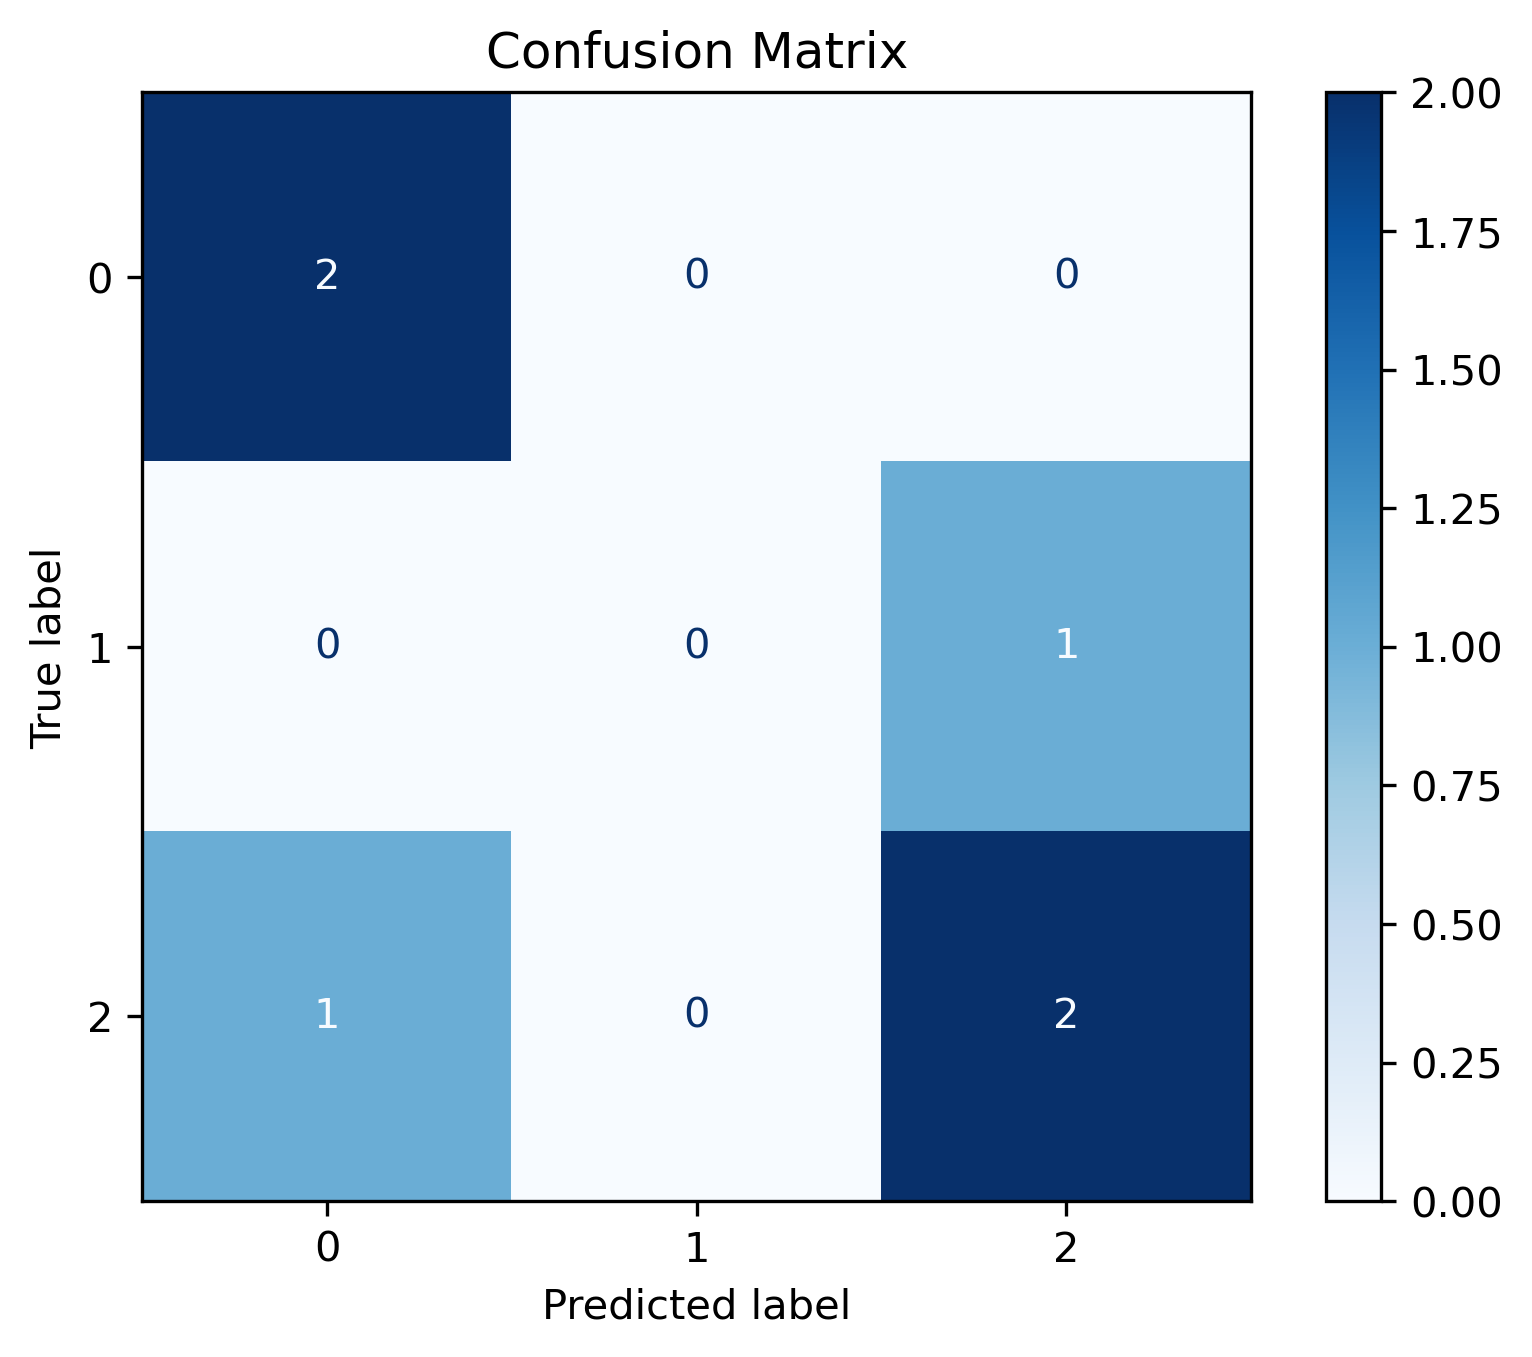

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cm = confusion_matrix(y_true, y_pred)

# 分辨率为 300 DPI
plt.rcParams['figure.dpi'] = 300
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')

In [ ]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
confusion_matrix(y_true, y_pred, normalize='all')

# array([[0.25 , 0.125],
#        [0.25 , 0.375]])

array([[0.25 , 0.125],
       [0.25 , 0.375]])

In [ ]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel().tolist()
tn, fp, fn, tp

# (2, 1, 2, 3)

(2, 1, 2, 3)

In [ ]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

# precision    recall  f1-score   support

#      class 0       0.67      1.00      0.80         2
#      class 1       0.00      0.00      0.00         1
#      class 2       1.00      0.50      0.67         2

#     accuracy                           0.60         5
#    macro avg       0.56      0.50      0.49         5
# weighted avg       0.67      0.60      0.59         5

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



In [28]:
from sklearn.metrics import hamming_loss
y_pred = [1, 2, 3, 4]
y_true = [2, 2, 3, 4]
hamming_loss(y_true, y_pred)

0.25

In [29]:
hamming_loss(np.array([[0, 1], [1, 1]]), np.zeros((2, 2)))

0.75

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.6666666666666666

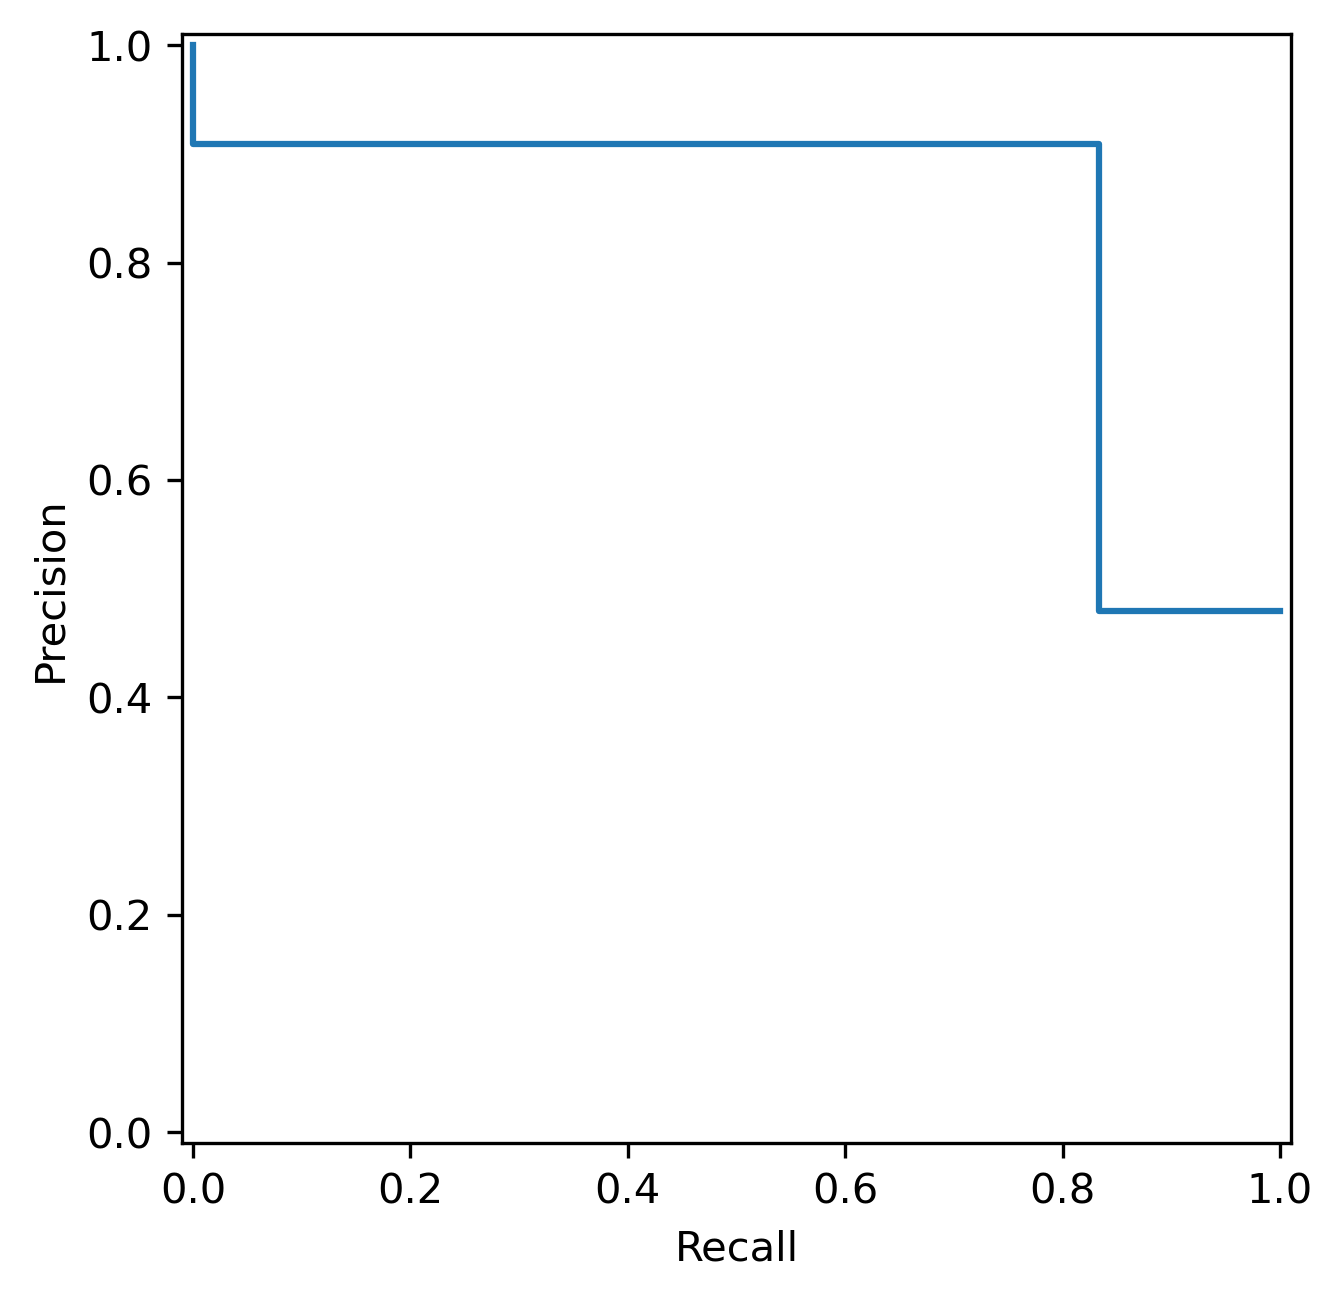

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import (precision_recall_curve,
                             PrecisionRecallDisplay)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [42]:
from sklearn import metrics
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
metrics.precision_score(y_true, y_pred)
metrics.recall_score(y_true, y_pred)
metrics.f1_score(y_true, y_pred)
metrics.fbeta_score(y_true, y_pred, beta=0.5)
metrics.fbeta_score(y_true, y_pred, beta=1)
metrics.fbeta_score(y_true, y_pred, beta=2)
metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5)


import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, threshold = precision_recall_curve(y_true, y_scores)
precision
recall
threshold
average_precision_score(y_true, y_scores)

0.8333333333333333

In [43]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
metrics.precision_score(y_true, y_pred, average='macro')
metrics.recall_score(y_true, y_pred, average='micro')
metrics.f1_score(y_true, y_pred, average='weighted')
metrics.fbeta_score(y_true, y_pred, average='macro', beta=0.5)
metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5, average=None)

(array([0.66666667, 0.        , 0.        ]),
 array([1., 0., 0.]),
 array([0.71428571, 0.        , 0.        ]),
 array([2, 2, 2]))

In [44]:
import numpy as np
from sklearn.metrics import jaccard_score
y_true = np.array([[0, 1, 1],
                   [1, 1, 0]])
y_pred = np.array([[1, 1, 1],
                   [1, 0, 0]])
jaccard_score(y_true[0], y_pred[0])

0.6666666666666666

In [46]:
from sklearn import svm
from sklearn.metrics import hinge_loss
X = [[0], [1]]
y = [-1, 1]
est = svm.LinearSVC(random_state=0)
est.fit(X, y)
pred_decision = est.decision_function([[-2], [3], [0.5]])
pred_decision
hinge_loss([-1, 1, 1], pred_decision)

0.30303030303030304

In [47]:
from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]
y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
log_loss(y_true, y_pred)

0.1738073366910675

In [48]:
from sklearn.metrics import matthews_corrcoef
y_true = [+1, +1, +1, -1]
y_pred = [+1, -1, +1, +1]
matthews_corrcoef(y_true, y_pred)

-0.3333333333333333

In [49]:
import numpy as np
from sklearn.metrics import roc_curve
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)
fpr
tpr
thresholds

array([ inf, 0.8 , 0.4 , 0.35, 0.1 ])

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y, scores)
roc_auc

0.75

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


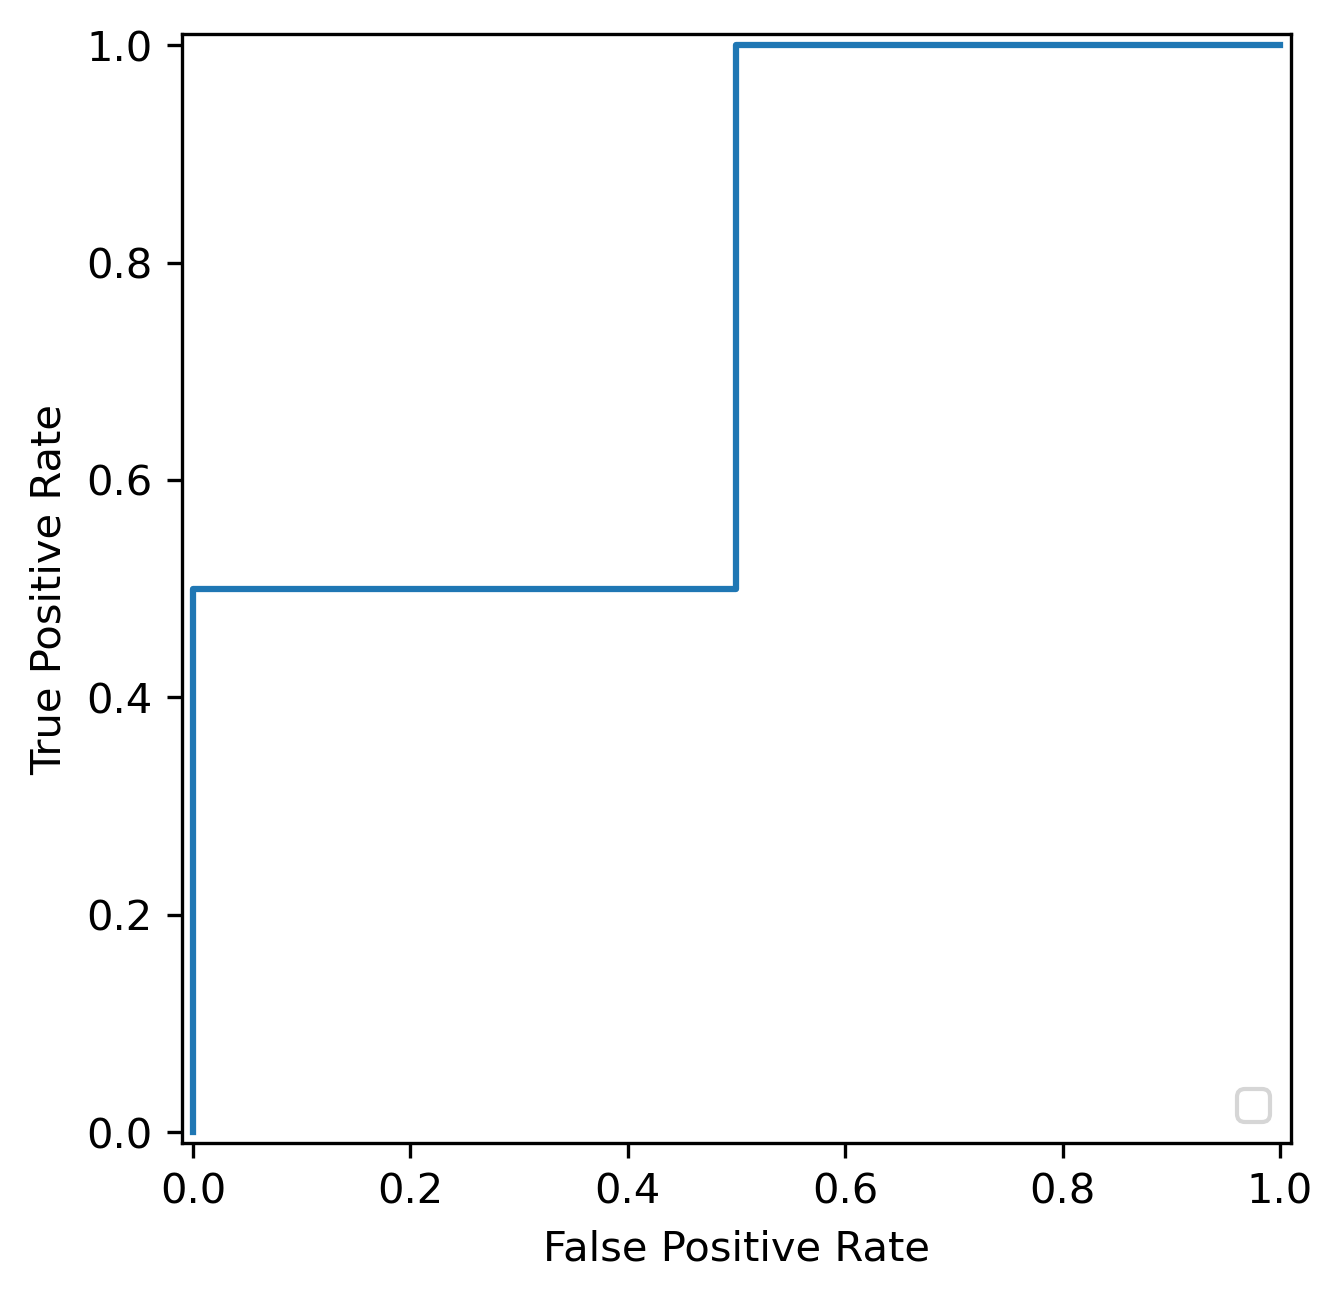

In [53]:
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot()

In [54]:
from sklearn.metrics import zero_one_loss
y_pred = [1, 2, 3, 4]
y_true = [2, 2, 3, 4]
zero_one_loss(y_true, y_pred)
zero_one_loss(y_true, y_pred, normalize=False)

1.0

In [55]:
zero_one_loss(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))

zero_one_loss(np.array([[0, 1], [1, 1]]), np.ones((2, 2)),  normalize=False)

1.0

In [58]:
import numpy as np
from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1, 1, 0])
y_true_categorical = np.array(["spam", "ham", "ham", "spam"])
y_prob = np.array([0.1, 0.9, 0.8, 0.4])
brier_score_loss(y_true, y_prob)
brier_score_loss(y_true, 1 - y_prob, pos_label=0)
brier_score_loss(y_true_categorical, y_prob, pos_label="ham")
brier_score_loss(
   ["eggs", "ham", "spam"],
   [[0.8, 0.1, 0.1], [0.2, 0.7, 0.1], [0.2, 0.2, 0.6]],
   labels=["eggs", "ham", "spam"],
)

TypeError: got an unexpected keyword argument 'labels'

In [59]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
r2_score(y_true, y_pred, multioutput='variance_weighted')
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
r2_score(y_true, y_pred, multioutput='uniform_average')
r2_score(y_true, y_pred, multioutput='raw_values')
r2_score(y_true, y_pred, multioutput=[0.3, 0.7])
y_true = [-2, -2, -2]
y_pred = [-2, -2, -2]
r2_score(y_true, y_pred)
r2_score(y_true, y_pred, force_finite=False)
y_true = [-2, -2, -2]
y_pred = [-2, -2, -2 + 1e-8]
r2_score(y_true, y_pred)
r2_score(y_true, y_pred, force_finite=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:930: RuntimeWarning: invalid value encountered in divide
  output_scores = 1 - (numerator / denominator)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:930: RuntimeWarning: divide by zero encountered in divide
  output_scores = 1 - (numerator / denominator)


-inf

In [60]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_absolute_error(y_true, y_pred)
mean_absolute_error(y_true, y_pred, multioutput='raw_values')
mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.85

In [61]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_squared_error(y_true, y_pred)

0.7083333333333334

In [62]:
from sklearn.metrics import mean_squared_log_error
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]
mean_squared_log_error(y_true, y_pred)
y_true = [[0.5, 1], [1, 2], [7, 6]]
y_pred = [[0.5, 2], [1, 2.5], [8, 8]]
mean_squared_log_error(y_true, y_pred)

0.044199361889160536

In [63]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = [1, 10, 1e6]
y_pred = [0.9, 15, 1.2e6]
mean_absolute_percentage_error(y_true, y_pred)

0.26666666666666666